## 기초데이터과학 (01분반)

## Programming assignment 07

### 1.NYC 온도 데이터 Dataset로 각 문제에 맞게 코드를 작성하세요.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

# 데이터 불러오기
data = pd.read_csv(url, parse_dates=["Date"])

# 데이터 확인
data.head(5)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### 1-1. 온도 변화를 확인할 수 있도록 선 그래프를 출력하세요.

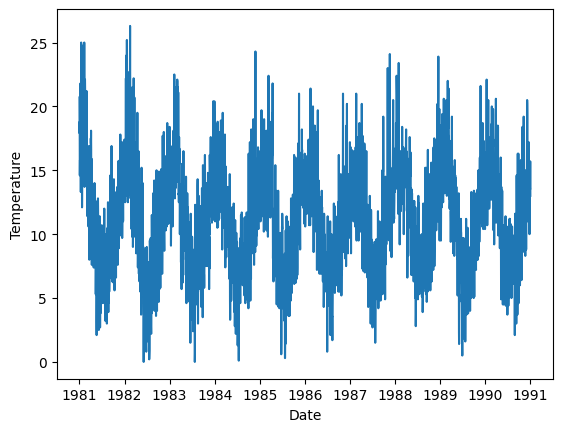

In [166]:
# 선 그래프 그리기
data_cp = data.copy()
data_cp = data_cp.sort_index(ascending=False) # 날짜 순서를 변경해주기 위해서 sort_index() 함수 사용

sns.lineplot(data=data_cp, x='Date', y='Temp')
plt.xlabel('Date')
# plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.show()

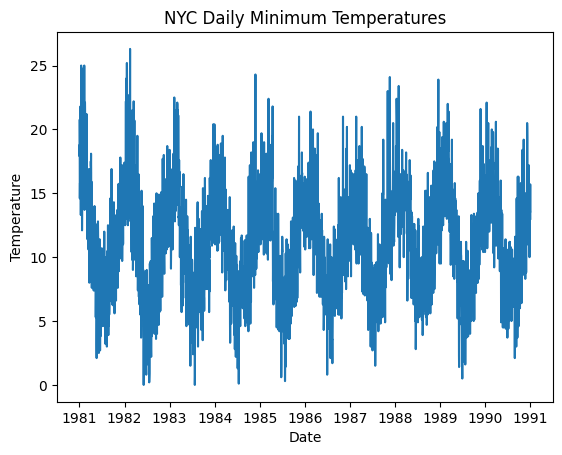

In [8]:
# 이 셀을 실행하지 마시오.

#### 1-2. 데이터셋의 가장 오래된 일과 가장 최신 일 간격을 계산하세요.

In [167]:
# 데이터셋의 기록된 시작 날과 끝나는 날 간격 계산

min_data = data_cp['Date'].min()
max_data = data_cp['Date'].max()
dif_data = (max_data-min_data).days

print(f'Start  Date:{min_data}, End date: {max_data}, Duration: {dif_data} Days')


Start  Date:1981-01-01 00:00:00, End date: 1990-12-31 00:00:00, Duration: 3651 Days


#### 1-3. '1985'년 데이터만 추출해서 그래프를 출력하세요.

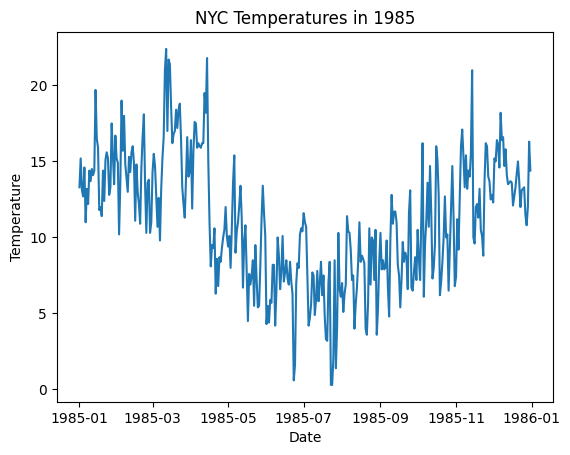

In [168]:
# 'Date' 속성을 인덱스로 설정
# data_cp_dt=data_cp.set_index('Date')
data_cp_dt = data_cp.copy()
data_cp_dt.index = data_cp['Date']
# print(data_cp_dt.index)

# '1985' 데이터만 추출하여 변수에 저장
# print(data_cp_dt.loc['1985'])
src_1985 = data_cp_dt.loc['1985']
src_1985
# 선 그래프 출력
sns.lineplot(data=src_1985, x='Date', y='Temp')
plt.title('NYC Temperatures in 1985')
plt.xlabel('Date')
# plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.show()


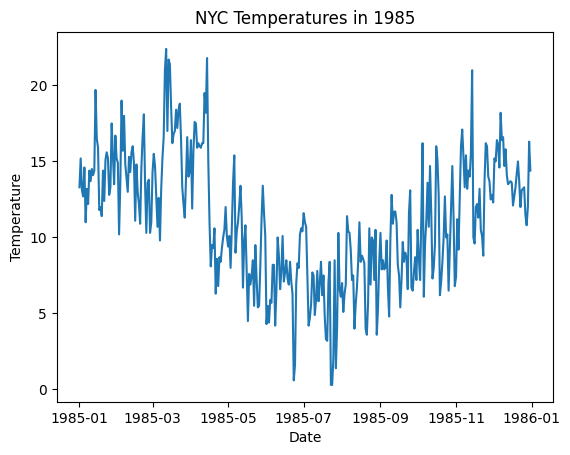

In [ ]:
# 이 셀을 실행하지 마시오.

#### 1-4. 데이터셋을 월 주기(매월 말일)로 다운샘플링하여 그래프를 출력하세요.

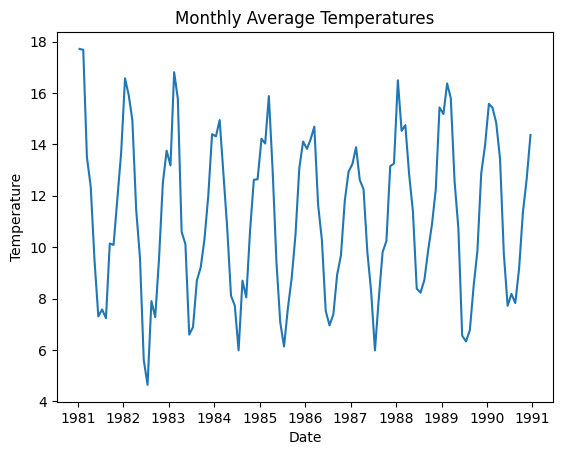

In [169]:
# 매월 말일 기준으로 평균값으로 다운샘플링
down2 = data_cp_dt.resample('ME').mean() 

# print(down2.iloc[:, :4]) # 4개 열만 추출하여 출력


# 선 그래프 출력
sns.lineplot(data=down2, x='Date', y='Temp')
plt.title('Monthly Average Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


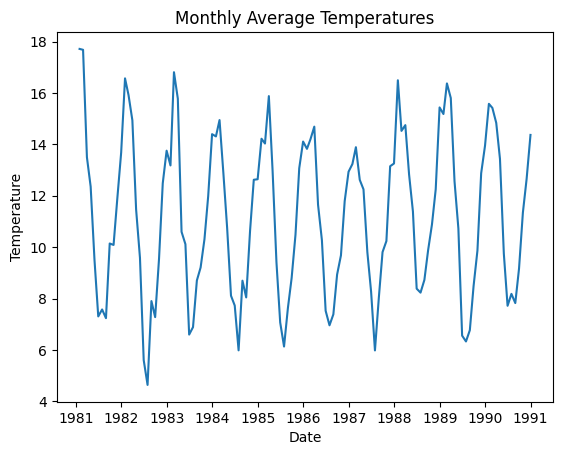

In [11]:
# 이 셀을 실행하지 마시오.

### 2. Our World in Data COVID-19 Dataset로 각 문제에 맞게 코드를 작성하세요.

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url, parse_dates=["date"])

# 한국 데이터만 저장 (location 컬럼 값이 South Korea인 행만 추출)
country_data = data[data['location'] == 'South Korea']

country_data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
359238,KOR,Asia,South Korea,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,24.4,0.38,0.38,0.470636
359239,KOR,Asia,South Korea,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN
359240,KOR,Asia,South Korea,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN
359241,KOR,Asia,South Korea,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN
359242,KOR,Asia,South Korea,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808,NaN,NaN,NaN,NaN


#### 2-1. 한국의 날짜별 신규 확진자 그래프를 그리세요.

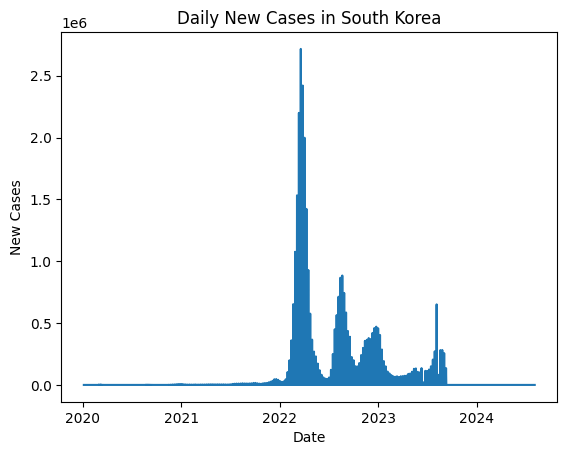

In [171]:
# 데이터셋의 'new_cases' (신규 확진자) 그래프 그리기
# year = country_data['date']
# print(year)
sns.lineplot(data=country_data, x='date', y='new_cases')
plt.title('Daily New Cases in South Korea')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()



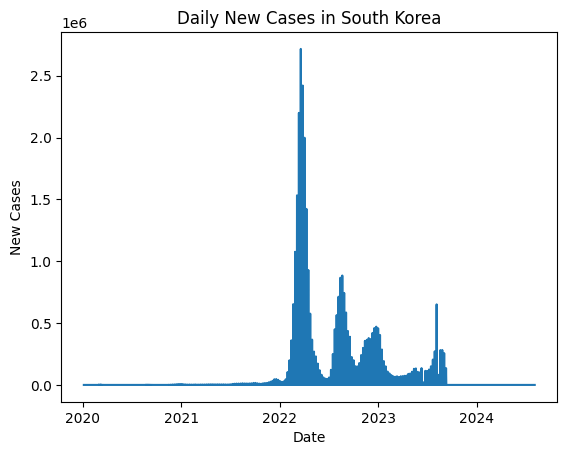

In [19]:
# 이 셀을 실행하지 마시오.

#### IMPT 2-2. 코로나 발병 365일부터 730일 사이 신규확진자 수를 계산하세요.

In [172]:
# 기준일로부터 각 date 컬럼 값 차이를 계산하여 ref_date 컬럼으로 저장
reference_date = country_data['date'].min()

# 'ref_date' 컬럼을 인덱스로 설정
country_data_cp = country_data.copy()
country_data_cp['ref_date'] = (country_data_cp['date'] - reference_date).dt.days
country_data_cp.set_index('ref_date', inplace=True)

# '365 day'부터 '730 day'까지 신규 확진자 수의 합계 계산
new_cases_sum = country_data_cp.loc[365:730, 'new_cases'].sum()


# 결과 출력
print(f"Total cases from 365 day to 730 day : {new_cases_sum}")


Total cases from 365 day to 730 day : 577951.0


#### 2-3. 2022년 3월 신규 확진자 수를 그래프로 출력하세요.

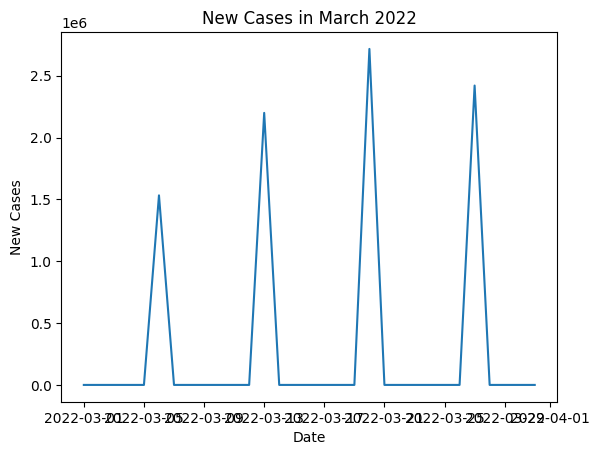

In [173]:
# date 컬럼을 인덱스로 설정하고 '2022-03' 데이터 추출
country_data_cp.index = country_data_cp['date'] 
src_2022_03 = country_data_cp.loc['2022-03']
src_2022_03

# 그래프 출력
sns.lineplot(data=src_2022_03, x='date', y='new_cases')
plt.title('New Cases in March 2022')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()



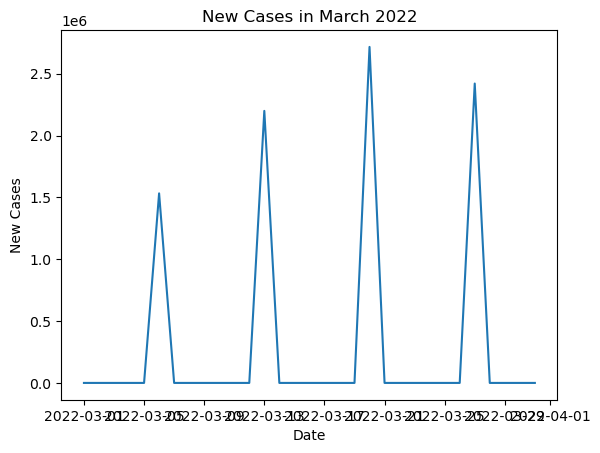

In [9]:
# 이 셀을 실행하지 마시오.

#### 2-4. 데이터셋을 주별 신규 확진자 합계로 다운샘플링하여 그래프를 출력하세요.

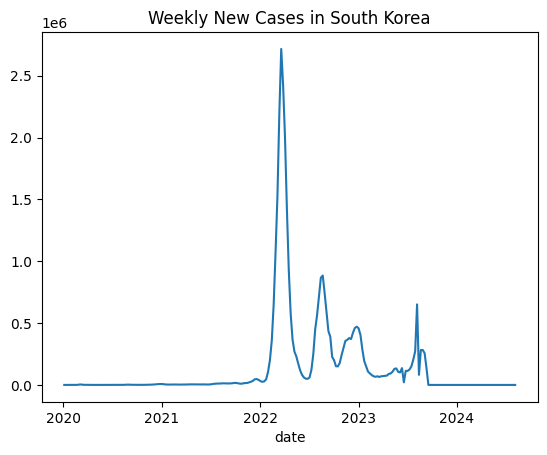

In [177]:
# 리샘플링 (주별 신규 확진자 합계)
upDay = country_data_cp.resample('W').asfreq()
upDay.iloc[:10, :4] # 첫 10개 행, 4개 열만 추출

# 그래프 출력
sns.lineplot(data=upDay, x='date', y='new_cases')
plt.title('Weekly New Cases in South Korea')
plt.xlabel('date')
plt.ylabel('')
plt.show()




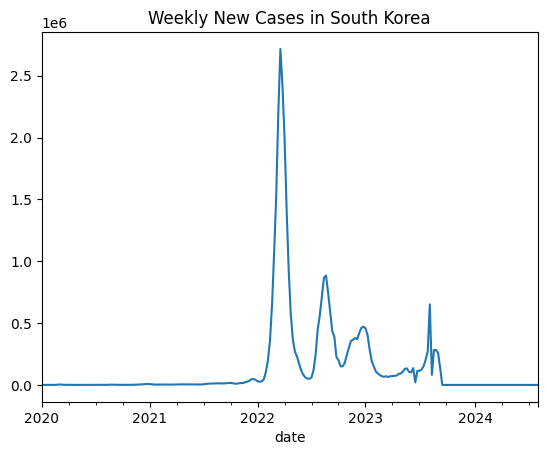

In [ ]:
# 이 셀을 실행하지 마시오. 

### 3. Bitcoin Historical Dataset로 각 문제에 맞게 코드를 작성하세요.

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
data = pd.read_csv(url, skiprows=1, parse_dates=["Date"])

data.head(5)

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1732924800000,2024-11-30,BTCUSDT,97460.00,97463.95,96092.01,96407.99,14503.83306,1.402673e+09,3354759
1,1732838400000,2024-11-29,BTCUSDT,95643.99,98619.99,95364.99,97460.00,27701.78231,2.690451e+09,5094070
2,1732752000000,2024-11-28,BTCUSDT,95863.11,96564.00,94640.00,95643.98,28814.54357,2.749862e+09,4988161
3,1732665600000,2024-11-27,BTCUSDT,91965.16,97208.21,91792.14,95863.11,41153.42734,3.894359e+09,6648690
4,1732579200000,2024-11-26,BTCUSDT,93010.01,94973.37,90791.10,91965.16,57858.73138,5.370919e+09,10225809


#### 3-1. 비트 코인의 일별 종가 그래프를 그리세요.

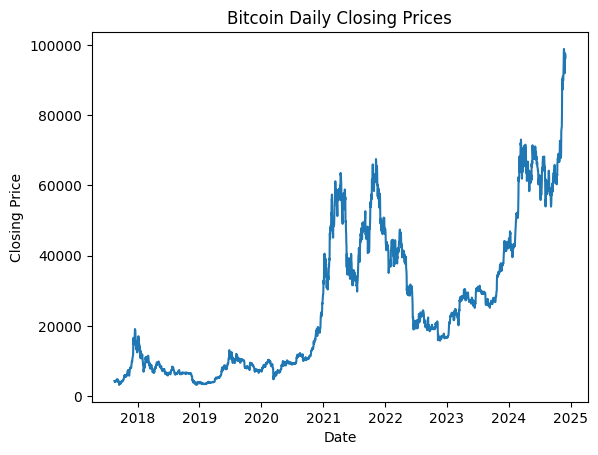

In [193]:
# 데이터셋의 'Close' (일별 종가) 속성 그래프 그리기
bit_cp = data.copy()
sns.lineplot(data=bit_cp, x='Date', y='Close')
plt.title('Bitcoin Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

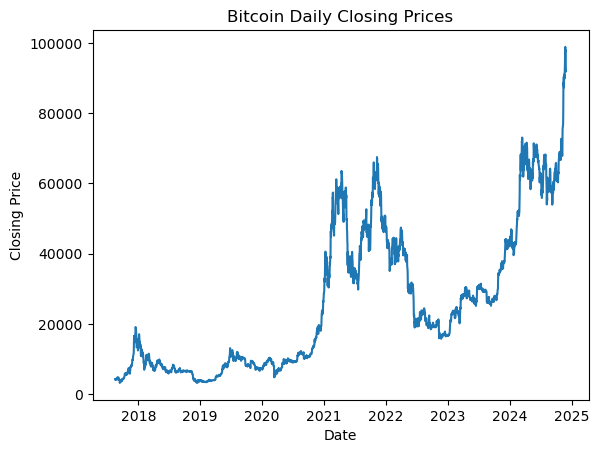

In [12]:
# 이 셀을 실행하지 마시오.

#### IMPT 3-2. 비트 코인 데이터셋에서 가장 높은 종가가 발생한 날짜를 출력하세요.

In [188]:
# 가장 높은 종가가 발생한 날짜 찾기
ref_high = bit_cp['High'].max()
highest_high_date = data.loc[data['High'] == ref_high, 'Date'].iloc[0]  # 해당 날짜 가져오기

# 결과 출력
print(f"Highest Close Price Date: {highest_high_date}")

Highest Close Price Date: 2024-11-22 00:00:00


#### IMPT 3-3. 2022년의 일별 종가 그래프를 출력하세요.

In [189]:
# 시간 인덱스를 'Date'로 설정하고 '2022' 추출
bit_cp_dt = bit_cp.set_index('Date')
src_2022 = bit_cp_dt.loc['2022']
# 2022년의 'Close' (일별 종가) 그래프 출력
upDay = src_2022.resample('D').asfreq()


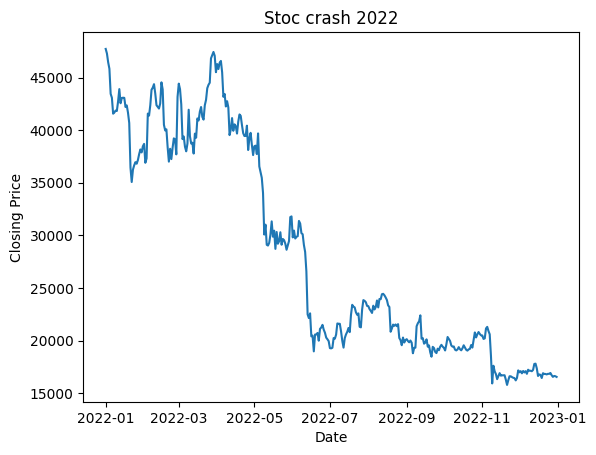

In [190]:
# 선 그래프 출력
sns.lineplot(data=upDay, x='Date', y='Close')
plt.title('Stoc crash 2022')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

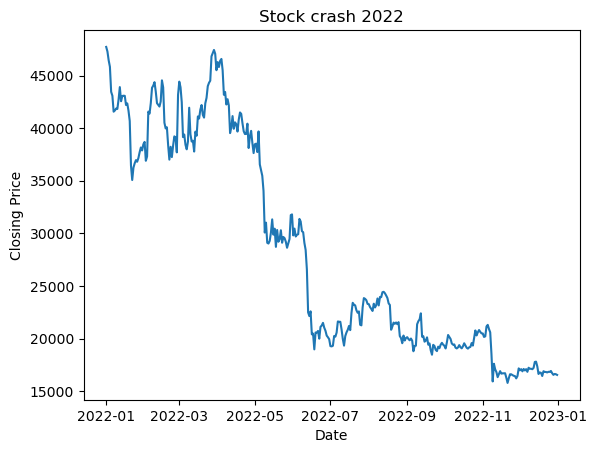

In [14]:
# 이 셀을 실행하지 마시오.

#### IMPT 3-4. 데이터셋을 월 주기(매월 1일)로 다운샘플링하여 그래프를 출력하세요.

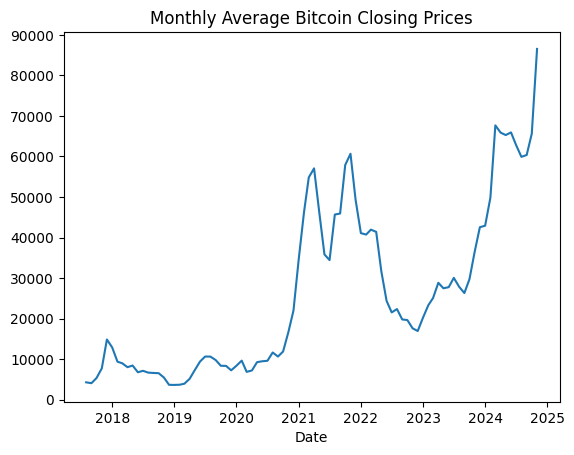

In [199]:
# 매월 1일 기준으로 평균값으로 다운샘플링
bit_cp = data.copy()

# 'Date'를 인덱스로 설정
bit_cp['Date'] = pd.to_datetime(bit_cp['Date'])  # datetime으로 변환
bit_cp.set_index('Date', inplace=True)  # 인덱스 설정

# 숫자형 데이터만 선택
bit_cp_numeric = bit_cp.select_dtypes(include=['number'])

# 매월 1일 기준 평균값으로 다운샘플링
monthly_avg = bit_cp_numeric.resample('MS').mean()

plt.plot(monthly_avg.index, monthly_avg['Close'])
plt.title('Monthly Average Bitcoin Closing Prices')
plt.xlabel('Date')

# y축 단위를 10,000 단위로 설정
y_max = int(monthly_avg['Close'].max() * 1.1)  # 최대값에 여유를 추가
plt.yticks(range(0, y_max + 1, 10000))  # 0부터 최대값까지 10,000 단위로 설정

plt.show()


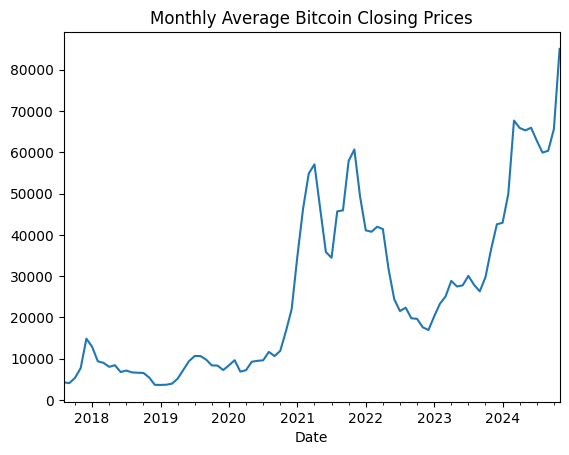

In [ ]:
# 이 셀을 실행하지 마시오.

### IMPT4. European Central Bank Exchange Rate Dataset로 각 문제에 맞게 코드를 작성하세요.

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
# url = "https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist.csv"
# data = pd.read_csv(url)

data = pd.read_csv("../eurofxref-hist.csv")

data.head(5)


,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,IDR,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,2010-02-14,2.0000,1.00,2.0000,NaN,1.000,2.0000,1.0000,2.0000,1.00,...,1.50,1.600,1.70,1.8000,1.9000,2.1000,2.200,2.3000,2.400,2.5000
1,2010-02-12,5.0000,6.00,7.0000,NaN,8.000,9.0000,10.0000,11.0000,12.00,...,28.00,29.000,30.00,31.0000,32.0000,33.0000,34.000,35.0000,36.000,37.0000
2,2010-02-10,1.3740,123.01,1.9558,NaN,26.108,7.4449,15.6466,0.8798,271.55,...,12871.34,63.884,1591.64,17.9438,4.7149,1.9827,63.800,1.9483,45.576,10.5998
3,2010-02-09,1.3760,123.40,1.9558,NaN,26.099,7.4448,15.6466,0.8804,272.00,...,12878.09,64.197,1601.45,18.0645,4.7235,1.9877,63.836,1.9511,45.649,10.5992
4,2010-02-08,1.3675,122.07,1.9558,NaN,26.168,7.4442,15.6466,0.8761,273.90,...,12861.76,64.013,1602.60,18.0130,4.7063,1.9914,63.705,1.9450,45.387,10.6097


#### 4-1. 유로 달러 환율 그래프를 출력하세요.

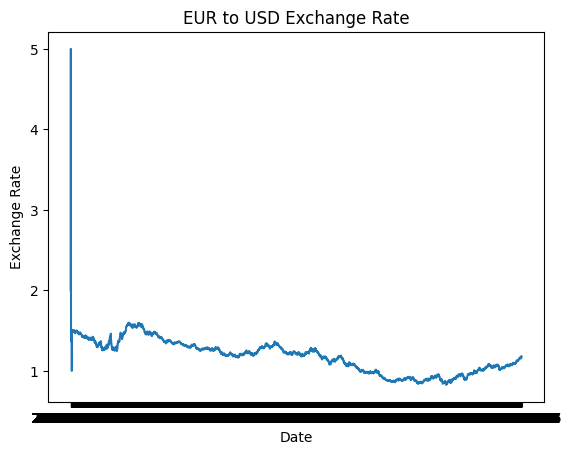

In [201]:
# 'USD' (달러) 속성에 대한 그래프 출력
glob_data = data.copy()
# 선 그래프 출력
sns.lineplot(data=glob_data, x='Date', y='USD')
plt.title('EUR to USD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


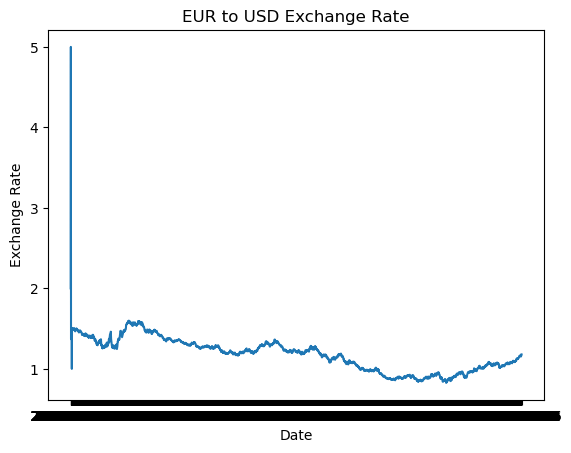

In [20]:
# 이 셀을 실행하지 마시오.

#### 4-2. 환율 데이터의 가장 오래된 날짜와 최신 날짜를 출력하고, 두 날짜 간의 시간 간격(일 수)을 계산하세요.

In [204]:
# 'Date' 속성을 datetime 객체로 변환
glob_data['Date'] = pd.to_datetime(glob_data['Date'])

# 데이터셋의 기록된 시작 날과 끝나는 날 간격 계산
start_date = glob_data['Date'].min()  # 가장 오래된 날짜
end_date = glob_data['Date'].max()  # 최신 날짜
duration = (end_date - start_date).days

# 결과 출력
print(f"Start Date: {start_date}, End Date: {end_date}, Duration: {duration} days")

Start Date: 1999-01-05 00:00:00, End Date: 2010-02-14 00:00:00, Duration: 4058 days


#### 4-3. 2010년 1월의 엔화 데이터를 그래프로 출력하세요.

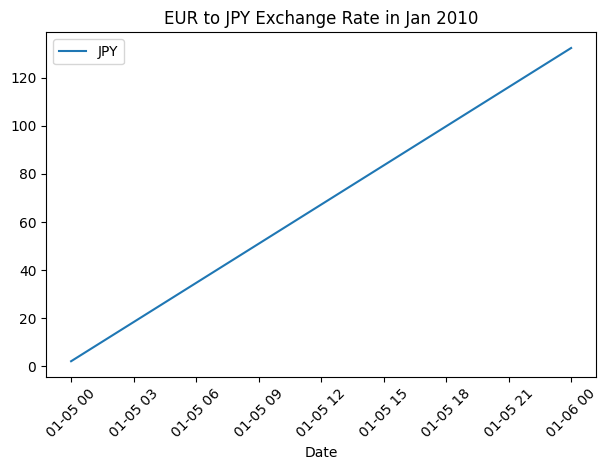

In [206]:
# Date 컬럼을 인덱스로 설정
glob_data.set_index('Date', inplace=True)

# 2010년 1월 데이터 추출
M1_2010_dt   = glob_data.loc['2010-01']

# 'JPY' 속성에 대한 그래프 출력
# 선 그래프 출력
sns.lineplot(data=M1_2010_dt, x=M1_2010_dt.index, y='JPY', label='JPY')
plt.title('EUR to JPY Exchange Rate in Jan 2010')
plt.xlabel('Date')
plt.xticks(rotation =45)
plt.legend()
plt.tight_layout()  # 그래프 간격 조정
plt.ylabel('')
plt.show()


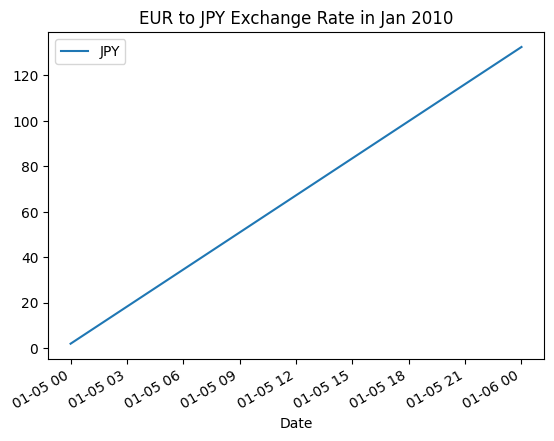

In [ ]:
# 이 셀을 실행하지 마시오.

#### 4-4. USD 컬럼의 데이터를 시간 단위로 업샘플링하고, 보간법(interpolation)을 사용하여 결측값을 채운 데이터를 그래프를 그려 시각화하세요.

C:\Users\didsu\AppData\Local\Temp\ipykernel_26124\3107136296.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  upsampled = glob_data['USD'].resample('H').asfreq()
C:\Users\didsu\AppData\Local\Temp\ipykernel_26124\3107136296.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


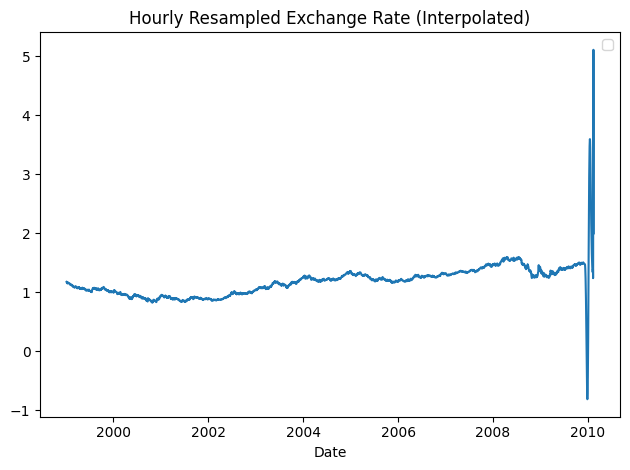

In [207]:
# 'USD' 속성에 대해 업샘플링 (시간 단위) 및 'polynomial' (다항식 보간법) 적용 (order=2)
upsampled = glob_data['USD'].resample('H').asfreq()

interpolated = upsampled.interpolate(method='polynomial', order=2)


# 그래프 출력
plt.plot(interpolated)
plt.title('Hourly Resampled Exchange Rate (Interpolated)')
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()


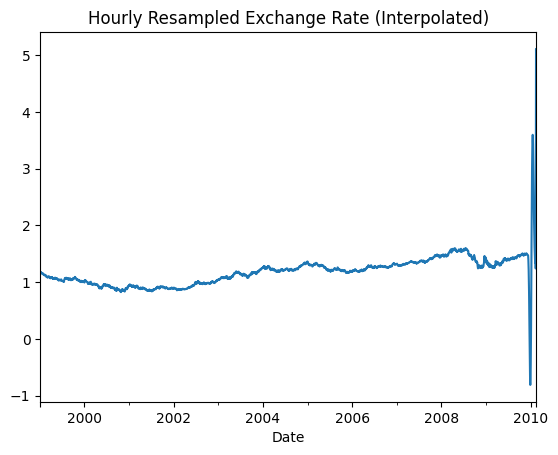

In [ ]:
# 이 셀을 실행하지 마시오.

####